# In this Notebook we will built a Simple Bigram model
First we will build a Statistical Model

## Statistical Model

In [405]:
import torch

In [404]:
names = open('names.txt', 'r').read().splitlines()
names

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

In [20]:
list(names[0])

['e', 'm', 'm', 'a']

In [407]:
vocab = ''.join(sorted(list(set(''.join(names)))))
vocab

'abcdefghijklmnopqrstuvwxyz'

In [10]:
stoi = {ch:i+1 for i,ch in enumerate(vocab)}
itos = {i+1:ch for i,ch in enumerate(vocab)}

In [12]:
stoi['.'] = 0
itos[0] = '.'
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [155]:
N = torch.zeros(27,27, dtype = torch.int32)

for w in names:
    w = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(w,w[1:]):
        bigrams = (stoi[ch1], stoi[ch2])
        N[bigrams] += + 1

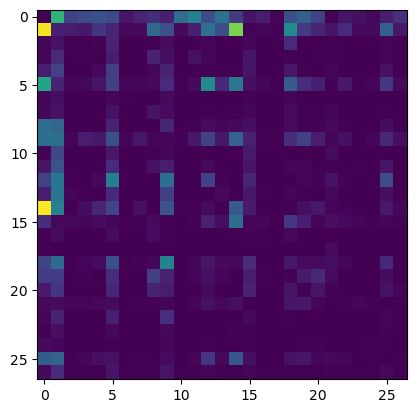

In [158]:
import matplotlib.pyplot as plt

plt.imshow(N)

In [30]:
g = torch.Generator().manual_seed(2147483647)
# p = torch.rand(3, generator = g)
# p = p/p.sum()
# p

In [192]:
# g = torch.Generator().manual_seed(2147483647)
ix = 0
# for i
p = N[ix].float()
p = p/p.sum()
G = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
# p = torch.rand(3, generator = g)


17

In [212]:
g = torch.Generator().manual_seed(2147483647)
for _ in range(50):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        # print(itos[ix])
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
emimmsade.
enkaviyny.
ftlspihinivenvorhlasu.
dsor.
br.
jol.
pen.
aisan.
ja.
feniee.
zem.
deru.
firit.
gaikajahahbevare.
kiysthelenaririenah.
keen.
x.
al.
kal.
thavazeeromysos.
laitenimieegariseriyen.
k.
illeleldole.
meenisammigama.
mmin.
asharin.
alcalar.
jayn.
asaz.
selanely.
chay.
rana.
ai.
yviamisashougen.
l.
beyncaro.
allan.
annutetoradrilia.
rddeman.


# This is a simple Bigram model, A statistical model

In [239]:
for w in ['cexze']: 
    w = ['.'] + list(w) + ['.']
    n = 0
    log_loss = 0
    for ch1, ch2 in zip(w,w[1:]):
        bigrams = (stoi[ch1], stoi[ch2])
        n+=1
        log_loss += -torch.log(P[bigrams])
print(f'prob = {P[bigrams]:.4f}, log_loss: {log_loss/n}')
    

prob = 0.1950, log_loss: 2.8384952545166016


# Now we will build small neural network 

In [260]:
x = []
y = []
for w in names:
    w = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(w,w[1:]):
        x.append(stoi[ch1])
        y.append(stoi[ch2])
        
xs = torch.tensor(x)
ys = torch.tensor(y)
ys

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [ ]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes = 27).float()
yenc = F.one_hot(ys, num_classes = 27).float()

In [402]:
W = torch.rand((27, 27), requires_grad=True)

batch_size = 128
r = 30
lr = 0.1
for j in range(r):
    batch_iter = xenc.shape[0] // batch_size
    print(batch_iter)
    for i in range(batch_iter):  # Loop for dividing the data into batch_size
        
        # Feed Forward 
        A = (xenc[batch_size*i:((batch_size*i)+batch_size)] @ W).exp()
        P = A / A.sum(axis=1, keepdims=True)  # Calculating the probabilities here
        batch_loss = -torch.sum((1 - yenc[batch_size*i:((batch_size*i)+batch_size)]) * torch.log(1 - P) + yenc[batch_size*i:((batch_size*i)+batch_size)] * torch.log(P))  # Calculating the loss here
        batch_loss /= batch_size
        print(f'Batch_No:{i}, {batch_loss=} for epoch = {j}')
        
        # Backward Pass
        W.grad = None
        batch_loss.backward()

        # Updating
        W.data -= lr * W.grad
        
        
    # calculating the last batch size loss
    batch_size_last = xenc.shape[0] - batch_iter * batch_size
    A = (xenc[batch_iter*batch_size:] @ W).exp()
    P = A / A.sum(axis=1, keepdims=True)  # Calculating the probabilities here
    batch_loss = -torch.sum(1 - yenc[batch_iter*batch_size:] * torch.log(1 - P) + yenc[batch_iter*batch_size:] * torch.log(P))  # Calculating the loss here
    batch_loss /= batch_size_last
    print(f'Batch_of_last:{i}, {batch_loss=} for epoch = {j}')
    
    # # Backward Pass
    # W.grad = None
    # batch_loss.backward()

    # Updating
    # W.data -= lr * W.grad


1782
Batch_No:0, batch_loss=tensor(4.3186, grad_fn=<DivBackward0>) for epoch = 0
Batch_No:1, batch_loss=tensor(4.3294, grad_fn=<DivBackward0>) for epoch = 0
Batch_No:2, batch_loss=tensor(4.2931, grad_fn=<DivBackward0>) for epoch = 0
Batch_No:3, batch_loss=tensor(4.2891, grad_fn=<DivBackward0>) for epoch = 0
Batch_No:4, batch_loss=tensor(4.3175, grad_fn=<DivBackward0>) for epoch = 0
Batch_No:5, batch_loss=tensor(4.2853, grad_fn=<DivBackward0>) for epoch = 0
Batch_No:6, batch_loss=tensor(4.2837, grad_fn=<DivBackward0>) for epoch = 0
Batch_No:7, batch_loss=tensor(4.2756, grad_fn=<DivBackward0>) for epoch = 0
Batch_No:8, batch_loss=tensor(4.2842, grad_fn=<DivBackward0>) for epoch = 0
Batch_No:9, batch_loss=tensor(4.2156, grad_fn=<DivBackward0>) for epoch = 0
Batch_No:10, batch_loss=tensor(4.2544, grad_fn=<DivBackward0>) for epoch = 0
Batch_No:11, batch_loss=tensor(4.2828, grad_fn=<DivBackward0>) for epoch = 0
Batch_No:12, batch_loss=tensor(4.3462, grad_fn=<DivBackward0>) for epoch = 0
Batc

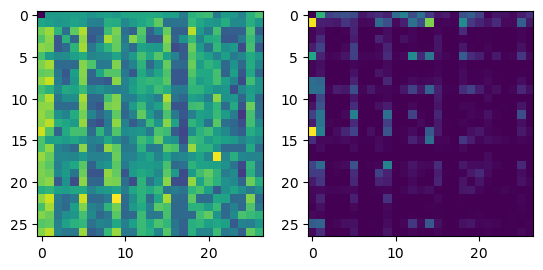

In [401]:
#We can see the Similarities between the Neural Network we trained and out statistical model
import matplotlib.pyplot as plt


ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ax1.imshow(W.data)
ax2.imshow(N)

plt.show()


In [390]:
#Predicting the names generated from our model
g = torch.Generator().manual_seed(2147483647)
for _ in range(10):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor(ix), num_classes = 27).float()
        logits = xenc @ W
        counts = logits.exp()
        # print(counts)
        P = counts/counts.sum(0, keepdims = True)
        ix = torch.multinomial(P, num_samples = 1, replacement = True, generator = g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

texze.
zemasuraion.
kayhamellimittain.
llayn.
kan.
a.
staiyaubrtthr.
gotos.
moliellavo.
ke.


### We can see that the weights got accumlated, So now we will regularize the loss function to smooth out the probabilities. Now we will have two terms in loss one which is the log part we will incentivise the algorithm to increase the one of the probabilities, And the regularized part which will try to smooth out the probabilities

In [294]:
W = torch.rand((27, 27), requires_grad=True)
batch_size = 608
r = 20
for j in range(r):
    batch_iter = xenc.shape[0] // batch_size
    print(batch_iter)
    for i in range(batch_iter):  # Loop for dividing the data into batch_size
        
        # Feed Forward 
        A = (xenc[batch_size*i:((batch_size*i)+batch_size)] @ W).exp()
        P = A / A.sum(axis=1, keepdims=True)  # Calculating the probabilities here
        batch_loss = -torch.sum((1 - yenc[batch_size*i:((batch_size*i)+batch_size)]) * torch.log(1 - P) + yenc[batch_size*i:((batch_size*i)+batch_size)] * torch.log(P) + 0.01*(W**2).mean())   # Calculating the loss here
        batch_loss /= batch_size
        print(f'Batch_No:{i}, {batch_loss=} for epoch = {j+1}')
        
        # Backward Pass
        W.grad = None
        batch_loss.backward()

        # Updating
        W.data -= 0.1 * W.grad
        
        
    # calculating the last batch size loss
    
    # batch_size_last = xenc.shape[0] - batch_iter * batch_size
    # A = (xenc[batch_iter*batch_size:] @ W).exp()
    # P = A / A.sum(axis=1, keepdims=True)  # Calculating the probabilities here
    # batch_loss = -torch.sum(1 - yenc[batch_iter*batch_size:] * torch.log(1 - P) + yenc[batch_iter*batch_size:] * torch.log(P) + 0.01*(W**2).mean())  # Calculating the loss here
    # batch_loss /= batch_size_last
    # print(f'Batch_of_last:{i}, {batch_loss=} for epoch = {j}')
    
    # Backward Pass
    # W.grad = None
    # batch_loss.backward()

    # # Updating
    # W.data -= 1 * W.grad


375
Batch_No:0, batch_loss=tensor(4.1579, grad_fn=<DivBackward0>) for epoch = 1
Batch_No:1, batch_loss=tensor(4.2009, grad_fn=<DivBackward0>) for epoch = 1
Batch_No:2, batch_loss=tensor(4.1907, grad_fn=<DivBackward0>) for epoch = 1
Batch_No:3, batch_loss=tensor(4.1994, grad_fn=<DivBackward0>) for epoch = 1
Batch_No:4, batch_loss=tensor(4.1979, grad_fn=<DivBackward0>) for epoch = 1
Batch_No:5, batch_loss=tensor(4.1936, grad_fn=<DivBackward0>) for epoch = 1
Batch_No:6, batch_loss=tensor(4.1739, grad_fn=<DivBackward0>) for epoch = 1
Batch_No:7, batch_loss=tensor(4.2120, grad_fn=<DivBackward0>) for epoch = 1
Batch_No:8, batch_loss=tensor(4.1866, grad_fn=<DivBackward0>) for epoch = 1
Batch_No:9, batch_loss=tensor(4.1905, grad_fn=<DivBackward0>) for epoch = 1
Batch_No:10, batch_loss=tensor(4.1782, grad_fn=<DivBackward0>) for epoch = 1
Batch_No:11, batch_loss=tensor(4.1966, grad_fn=<DivBackward0>) for epoch = 1
Batch_No:12, batch_loss=tensor(4.1897, grad_fn=<DivBackward0>) for epoch = 1
Batch

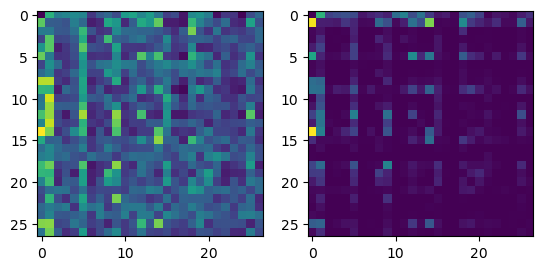

In [295]:
# A More refined model and we can see our neural network learning the similar patterns here.
import matplotlib.pyplot as plt


ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ax1.imshow(W.data)
ax2.imshow(N)

plt.show()


In [385]:
#Predicting the names generated from our model
g = torch.Generator().manual_seed(2147483647)
for _ in range(10):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor(ix), num_classes = 27).float()
        logits = xenc @ W
        counts = logits.exp()
        # print(counts)
        P = counts/counts.sum(0, keepdims = True)
        ix = torch.multinomial(P, num_samples = 1, replacement = True, generator = g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

dexza.
moglluraile.
kayharellimittain.
llayn.
ka.
da.
staiyaubjalerigotai.
mizamqckaugke.
teda.
ka.


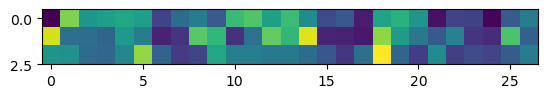

In [311]:
ix = 0
import numpy as np
# xenc = F.one_hot(torch.tensor([ix]), num_classes = 27)
plt.imshow(W.data[0:3])

In [383]:
xenc = F.one_hot(torch.tensor(ix), num_classes = 27).float()
logits = xenc @ W
counts = logits.exp()
counts.shape
P = counts/counts.sum(0, keepdims = True)


tensor(1.0000, grad_fn=<SumBackward0>)